In [15]:
%matplotlib inline

import os,sys,inspect

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [16]:
X_train = pd.read_csv('Dataset/train/Inertial Signals/body_acc_x_train.txt', header=None, delim_whitespace=True)
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None)

y_train = pd.read_csv('Dataset/train/y_train.txt', header = None, names = ['Activity'])
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
df = X_train
df['Activity'] = y_train
#df['ActivityName'] = y_train_labels


print('df: {}'.format(df.shape))


df: (7352, 130)


In [17]:
print(f"Number of time series: {df.shape[0]}\nLength: {df.shape[1]}")

Number of time series: 7352
Length: 130


# Preprocessing

## 1. Trasformations

#### I Offset Translation

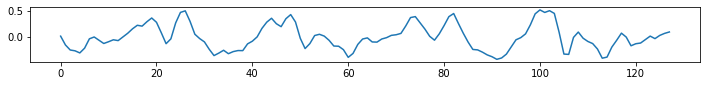

In [43]:
# test
ts1 =df.iloc[80,:-2]
plt.figure(figsize=(12,1))
plt.plot(ts1 - ts1.mean())
plt.show()

In [44]:
# apply offset transaltion to dataset
norm_df_offeset = df.copy()
for i in range(norm_df.shape[0]):
    norm_df_offeset.iloc[i,:-2] = (df.iloc[i,:-2] - df.iloc[i,:-2].mean())

norm_df_offeset.dropna(inplace=True, axis=1)
norm_df_offeset.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,subject,Activity
0,-0.002088,0.007870,0.007007,0.002797,0.008542,0.001776,0.002489,0.003945,0.001038,0.005303,...,-0.002208,-0.001833,-0.003087,-0.002041,-0.002569,-0.003416,-0.002491,-0.000693,1,5
1,0.000920,0.004376,0.002705,0.002074,0.003131,0.002242,0.001445,0.000808,-0.000165,-0.000537,...,0.001159,0.001367,0.000903,-0.000909,-0.003940,-0.004820,-0.003115,-0.001772,1,5
2,0.003103,0.001857,-0.000848,-0.004166,-0.007134,-0.003577,0.000304,0.000240,0.001734,-0.001374,...,-0.000696,-0.000822,-0.000708,-0.000744,-0.000284,0.000818,0.002689,0.001750,1,5
3,-0.002102,-0.001641,0.000058,0.000079,-0.000685,0.000669,0.000780,-0.003479,-0.009211,-0.010812,...,0.001029,0.000490,-0.000541,-0.002244,-0.001961,-0.001196,-0.001501,-0.000357,1,5
4,0.000283,-0.000077,0.001217,0.003321,0.002479,0.001080,0.002128,0.002465,0.002442,0.002370,...,-0.000053,-0.002565,0.000448,0.003948,0.001821,-0.000502,-0.001028,-0.003133,1,5


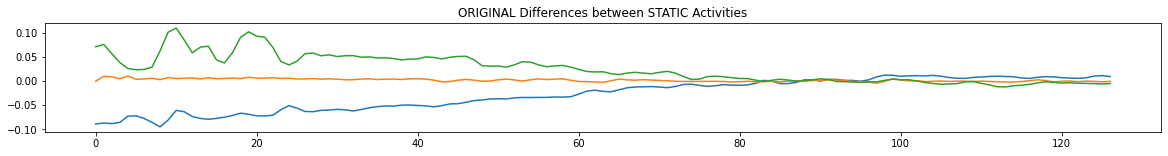

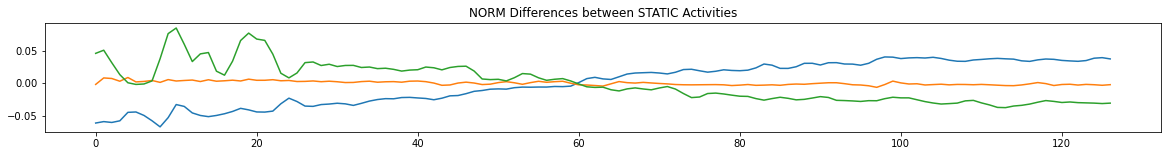

In [46]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
df[y_train['Activity']==4].iloc[0,:127].plot()
df[y_train['Activity']==5].iloc[0,:127].plot()
df[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df_offeset[y_train['Activity']==4].iloc[0,:127].plot()
norm_df_offeset[y_train['Activity']==5].iloc[0,:127].plot()
norm_df_offeset[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

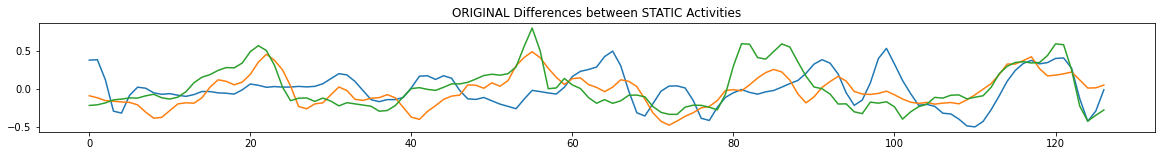

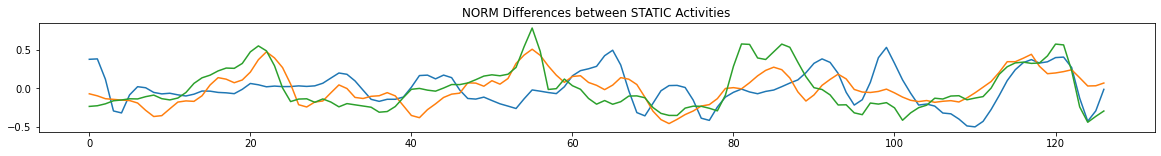

In [69]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
df[y_train['Activity']==1].iloc[0,:127].plot()
df[y_train['Activity']==2].iloc[0,:127].plot()
df[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df_offeset[y_train['Activity']==1].iloc[0,:127].plot()
norm_df_offeset[y_train['Activity']==2].iloc[0,:127].plot()
norm_df_offeset[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

#### II Trend removal

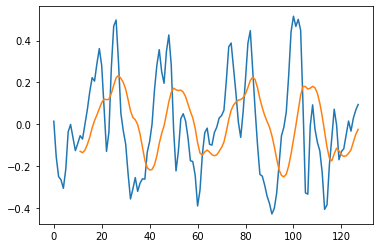

In [63]:
plt.plot(df.iloc[80,:-2])
plt.plot(df.iloc[80,:-2].rolling(window=12).mean())
plt.show()

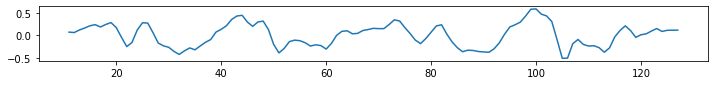

In [64]:
# test
ts1 =df.iloc[80,:-2]
plt.figure(figsize=(12,1))
plt.plot(ts1 - ts1.rolling(window=12).mean())
plt.show()

In [65]:
# apply offset transaltion to dataset
norm_df_trend = df.copy()
for i in range(norm_df.shape[0]):
    norm_df_trend.iloc[i,:-2] = (df.iloc[i,:-2] - df.iloc[i,:-2].mean())

norm_df_trend.dropna(inplace=True, axis=1)
norm_df_trend.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,subject,Activity
0,-0.002088,0.007870,0.007007,0.002797,0.008542,0.001776,0.002489,0.003945,0.001038,0.005303,...,-0.002208,-0.001833,-0.003087,-0.002041,-0.002569,-0.003416,-0.002491,-0.000693,1,5
1,0.000920,0.004376,0.002705,0.002074,0.003131,0.002242,0.001445,0.000808,-0.000165,-0.000537,...,0.001159,0.001367,0.000903,-0.000909,-0.003940,-0.004820,-0.003115,-0.001772,1,5
2,0.003103,0.001857,-0.000848,-0.004166,-0.007134,-0.003577,0.000304,0.000240,0.001734,-0.001374,...,-0.000696,-0.000822,-0.000708,-0.000744,-0.000284,0.000818,0.002689,0.001750,1,5
3,-0.002102,-0.001641,0.000058,0.000079,-0.000685,0.000669,0.000780,-0.003479,-0.009211,-0.010812,...,0.001029,0.000490,-0.000541,-0.002244,-0.001961,-0.001196,-0.001501,-0.000357,1,5
4,0.000283,-0.000077,0.001217,0.003321,0.002479,0.001080,0.002128,0.002465,0.002442,0.002370,...,-0.000053,-0.002565,0.000448,0.003948,0.001821,-0.000502,-0.001028,-0.003133,1,5


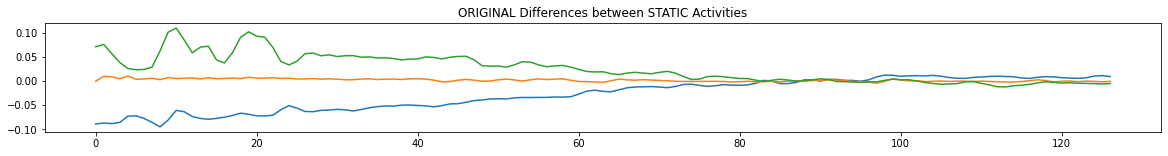

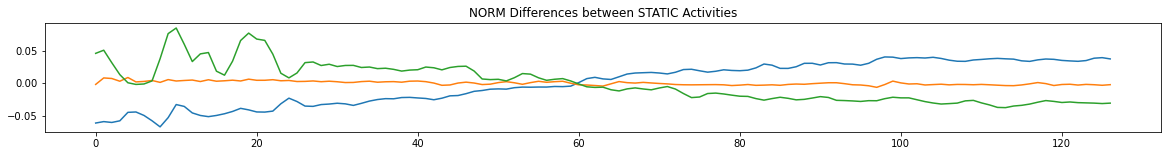

In [66]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
df[y_train['Activity']==4].iloc[0,:127].plot()
df[y_train['Activity']==5].iloc[0,:127].plot()
df[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df_trend[y_train['Activity']==4].iloc[0,:127].plot()
norm_df_trend[y_train['Activity']==5].iloc[0,:127].plot()
norm_df_trend[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

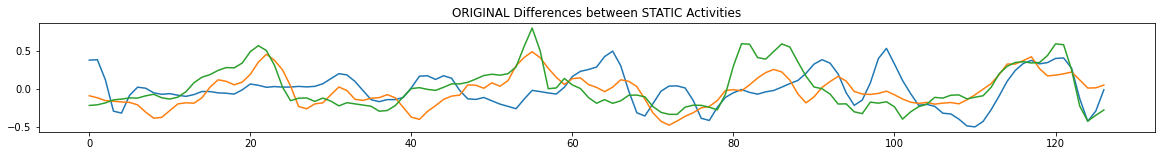

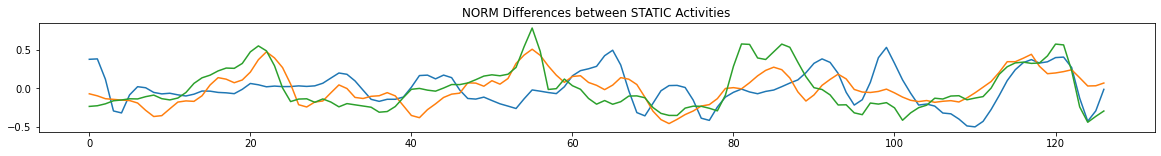

In [67]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
df[y_train['Activity']==1].iloc[0,:127].plot()
df[y_train['Activity']==2].iloc[0,:127].plot()
df[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df_trend[y_train['Activity']==1].iloc[0,:127].plot()
norm_df_trend[y_train['Activity']==2].iloc[0,:127].plot()
norm_df_trend[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

#### III Amplitude scaling (preferito)

In [18]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [19]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
norm_df = scaler.fit_transform(df.iloc[:,:-1])

In [20]:
norm_df = norm_df.squeeze()

<function matplotlib.pyplot.show(close=None, block=None)>

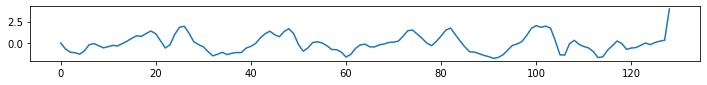

In [21]:
plt.figure(figsize=(12,1))
plt.plot(norm_df[80,:])
plt.show

In [22]:
norm_df = pd.DataFrame(norm_df)

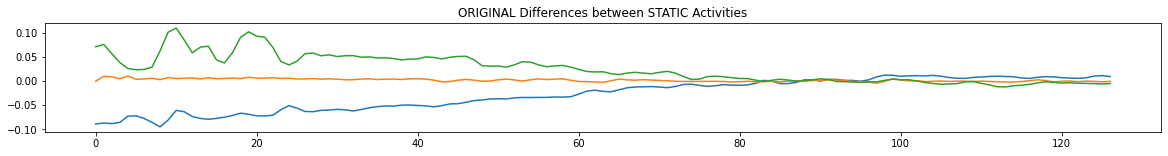

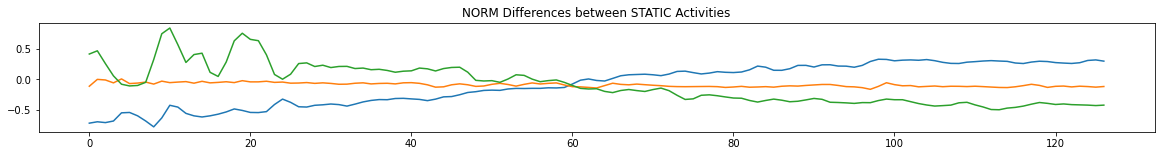

In [23]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
df[y_train['Activity']==4].iloc[0,:127].plot()
df[y_train['Activity']==5].iloc[0,:127].plot()
df[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df[y_train['Activity']==4].iloc[0,:127].plot()
norm_df[y_train['Activity']==5].iloc[0,:127].plot()
norm_df[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

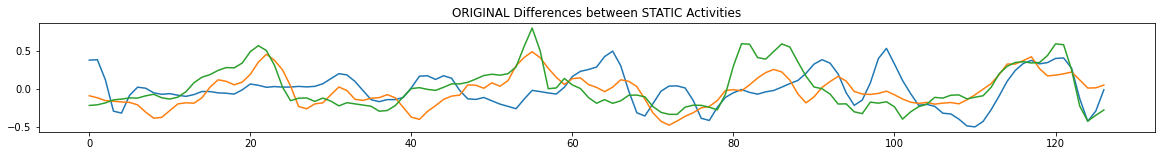

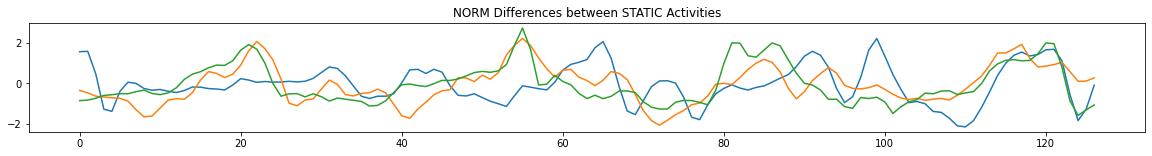

In [24]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
df[y_train['Activity']==1].iloc[0,:127].plot()
df[y_train['Activity']==2].iloc[0,:127].plot()
df[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df[y_train['Activity']==1].iloc[0,:127].plot()
norm_df[y_train['Activity']==2].iloc[0,:127].plot()
norm_df[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

Si hanno risultati molto simili, scelto **Amplitude scaling** come forma di trasformazione perché si vuole andare a confrontare le forme delle time series.

## 2. Moving average - time window = 2 (Preferito)

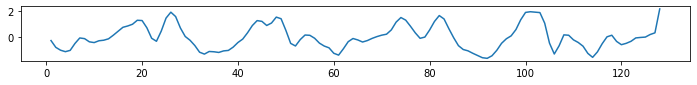

In [25]:
# test
w = 2
ts1 = norm_df.iloc[80,:]
plt.figure(figsize=(12,1))
plt.plot((ts1 - ts1.mean()/ts1.std()).rolling(window=w).mean())

In [26]:
# apply moving average to dataset
w = 2
norm_df_MA2 = norm_df.copy()
for i in range(norm_df.shape[0]):
    norm_df_MA2.iloc[i,:] = (norm_df.iloc[i,:] - norm_df.iloc[i,:].mean()/norm_df.iloc[i,:].std()).rolling(window=w).mean()
norm_df_MA2.dropna(inplace=True, axis=1)
norm_df_MA2.head()

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,-0.055319,-0.003381,-0.032350,-0.023585,-0.029415,-0.063982,-0.051598,-0.059882,-0.052125,-0.040130,...,-0.114805,-0.122525,-0.111420,-0.116439,-0.117625,-0.114664,-0.122517,-0.122073,-0.106523,5.605558
1,-0.058174,-0.047996,-0.061122,-0.058696,-0.057736,-0.067348,-0.075526,-0.084702,-0.092364,-0.095191,...,-0.091745,-0.083555,-0.073965,-0.075423,-0.088400,-0.116012,-0.138305,-0.133600,-0.116228,5.601135
2,-0.060065,-0.082588,-0.116920,-0.152755,-0.149396,-0.106992,-0.085236,-0.077087,-0.086288,-0.135529,...,-0.078894,-0.084186,-0.096994,-0.097062,-0.096617,-0.094204,-0.085298,-0.068351,-0.063040,5.619571
3,-0.109681,-0.097368,-0.087566,-0.091802,-0.088439,-0.080089,-0.103731,-0.160685,-0.202488,-0.177405,...,-0.077502,-0.072372,-0.079687,-0.088637,-0.104223,-0.112317,-0.106345,-0.103725,-0.098941,5.608027
4,-0.087192,-0.081866,-0.062503,-0.055314,-0.068084,-0.070084,-0.062192,-0.060399,-0.060940,-0.063776,...,-0.051684,-0.067508,-0.103286,-0.100434,-0.063320,-0.055492,-0.080849,-0.097087,-0.112078,5.593336


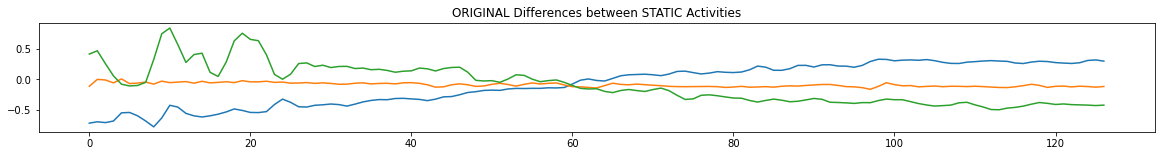

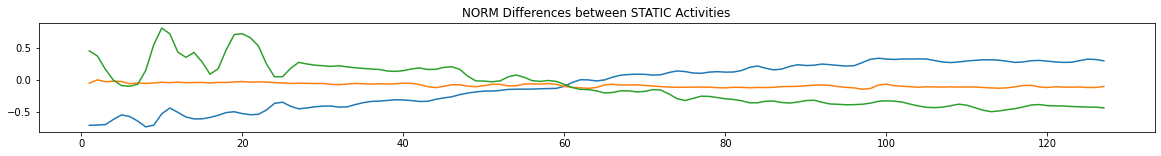

In [27]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
norm_df[y_train['Activity']==4].iloc[0,:127].plot()
norm_df[y_train['Activity']==5].iloc[0,:127].plot()
norm_df[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df_MA2[y_train['Activity']==4].iloc[0,:127].plot()
norm_df_MA2[y_train['Activity']==5].iloc[0,:127].plot()
norm_df_MA2[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

## 2. Moving average - time window = 3

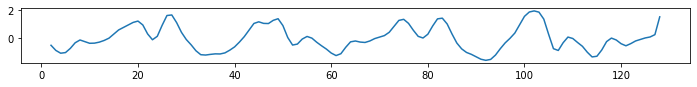

In [138]:
# test
w = 3
ts1 = norm_df.iloc[80,:]
plt.figure(figsize=(12,1))
plt.plot((ts1 - ts1.mean()/ts1.std()).rolling(window=w).mean())

In [139]:
# apply moving average to dataset
w = 3
norm_df_MA3 = norm_df.copy()
for i in range(norm_df.shape[0]):
    norm_df_MA3.iloc[i,:] = (norm_df.iloc[i,:] - norm_df.iloc[i,:].mean()/norm_df.iloc[i,:].std()).rolling(window=w).mean()
norm_df_MA3.dropna(inplace=True, axis=1)
norm_df_MA3.head()

,2,3,4,5,6,7,8,9,10,11,...,119,120,121,122,123,124,125,126,127,128
0,-0.039649,-0.021050,-0.018493,-0.038407,-0.039581,-0.057081,-0.059893,-0.049177,-0.052248,-0.041151,...,-0.103127,-0.114391,-0.118109,-0.115480,-0.114843,-0.117642,-0.118895,-0.120608,-0.113468,3.698109
1,-0.057956,-0.053572,-0.058305,-0.060065,-0.062455,-0.071285,-0.080432,-0.087962,-0.093543,-0.094929,...,-0.088032,-0.086213,-0.079963,-0.075332,-0.083193,-0.103364,-0.125114,-0.133497,-0.125258,3.692796
2,-0.072712,-0.100336,-0.134505,-0.144875,-0.127887,-0.099863,-0.079681,-0.086060,-0.113210,-0.134436,...,-0.087187,-0.084686,-0.088696,-0.096798,-0.096984,-0.094939,-0.089141,-0.076094,-0.068365,3.727152
3,-0.102348,-0.094062,-0.090429,-0.088109,-0.085444,-0.096062,-0.133608,-0.177661,-0.182724,-0.131765,...,-0.087437,-0.077207,-0.075834,-0.084630,-0.097068,-0.106383,-0.108874,-0.106051,-0.099957,3.703531
4,-0.082959,-0.071415,-0.061707,-0.062227,-0.066761,-0.066812,-0.061638,-0.060716,-0.062693,-0.065835,...,-0.060788,-0.064112,-0.084207,-0.096612,-0.081414,-0.064749,-0.068358,-0.087260,-0.106082,3.695530


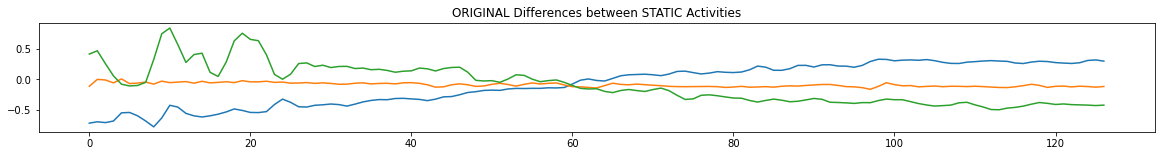

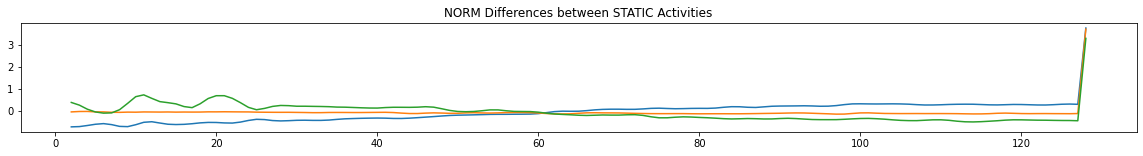

In [140]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
norm_df[y_train['Activity']==4].iloc[0,:127].plot()
norm_df[y_train['Activity']==5].iloc[0,:127].plot()
norm_df[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df_MA3[y_train['Activity']==4].iloc[0,:127].plot()
norm_df_MA3[y_train['Activity']==5].iloc[0,:127].plot()
norm_df_MA3[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

# Approximating Time Series

In [28]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

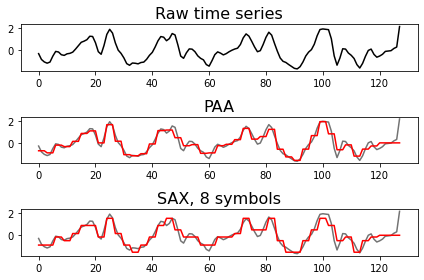

In [29]:
### PAA transform (and inverse transform) of the data
n_paa_segments = 40 # punti che approssimano le TS
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(norm_df_MA2)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(norm_df_MA2)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# PLOTTING FIRST TRACK 
plt.figure()
plt.subplot(3, 1, 1)  # First, raw time series
plt.plot(norm_df_MA2.iloc[80,:].ravel(), c="black")
plt.title("Raw time series", fontsize=16)

plt.subplot(3, 1, 2)  # Second, PAA
plt.plot(norm_df_MA2.iloc[80,:].ravel(), c="black", alpha=0.55)
plt.plot(paa_dataset_inv[80].ravel(), c="red")
plt.title("PAA",fontsize=16)

plt.subplot(3, 1, 3)  # Then SAX
plt.plot(norm_df_MA2.iloc[80,:].ravel(), c="black", alpha=0.55)
plt.plot(sax_dataset_inv[80].ravel(), c='red')
plt.title("SAX, %d symbols" % n_sax_symbols, fontsize=16)



plt.tight_layout()

#### Test altre configurazioni

Con 10/20 segmenti si ha una poca poca approssimazione = ne risulta quasi una linea retta

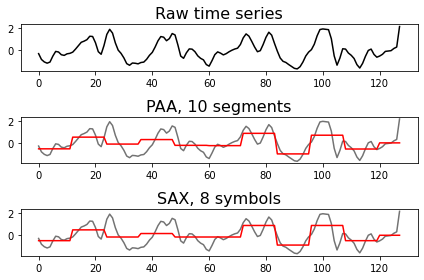

In [161]:
### PAA transform (and inverse transform) of the data
n_paa_segments = 10 #punti che approssimano le TS
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(norm_df_MA2)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(norm_df_MA2)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# PLOTTING FIRST TRACK 
plt.figure()
plt.subplot(3, 1, 1)  # First, raw time series
plt.plot(norm_df_MA2.iloc[80,:].ravel(), c="black")
plt.title("Raw time series", fontsize=16)

plt.subplot(3, 1, 2)  # Second, PAA
plt.plot(norm_df_MA2.iloc[80,:].ravel(), c="black", alpha=0.55)
plt.plot(paa_dataset_inv[80].ravel(), c="red")
plt.title("PAA, 10 segments",fontsize=16)

plt.subplot(3, 1, 3)  # Then SAX
plt.plot(norm_df_MA2.iloc[80,:].ravel(), c="black", alpha=0.55)
plt.plot(sax_dataset_inv[80].ravel(), c='red')
plt.title("SAX, %d symbols" % n_sax_symbols, fontsize=16)



plt.tight_layout()

Scelta di **40 segmenti** e **8 simboli** in quanto meglio approssimano le TS

# Clustering

Applicazione dell'algoritmo di clustering k-means sul dataset approssimato con SAX e PAA e sui dati RAW (senza approssimazione).

Applicazione delle metriche Euclidean e Dtw

SAX (8 symbols)
- SAX - Euclidean
- SAX - DTW
- SAX - Itakura
- SAX - Sakoe-chiba
- SAX - DTW soft

PAA (60 segments)
- PAA - Euclidean
- PAA - DTW
- PAA - DTW soft

RAW
- RAW - Euclidean
- RAW - DTW

In [30]:
from tslearn.clustering import TimeSeriesKMeans

from sklearn.metrics import silhouette_score

## SAX (8 symbols) - Euclidean

In [162]:
# SAX transform -- 8 symbols
n_paa_segments = 40
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(norm_df)
ts_sax_inv = sax.inverse_transform(ts_sax)
ts_sax = ts_sax.squeeze()
df_sax = pd.DataFrame(ts_sax, index=df.index)

Un modo per determinare il numero di clusters è attraverso il silhouette score e SSE:
- Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].
     - Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
- SSE dovrebbe essere più vicino a 1



In [164]:
# computing optimal number of clusters by silhouette score e SSE
sse_sax=[]
sil_sax=[]

max_k=30
for k in tqdm(range(2, max_k+1)):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric='euclidean', max_iter=20, random_state=42, n_jobs=-1)
    kmeans.fit(df_sax)
    sil = silhouette_score(df_sax, kmeans.labels_)
    sse = kmeans.inertia_
    sil_sax.append(sil)
    sse_sax.append(sse)   

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:32<00:00,  3.20s/it]


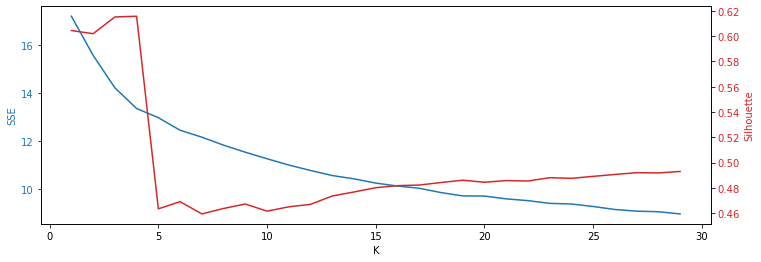

In [165]:
fig, ax1 = plt.subplots(figsize=(12,4))
t = np.arange(1,30,1)
color='tab:blue'
ax1.set_ylabel("SSE", color=color)
ax1.set_xlabel('K')
ax1.plot(t, sse_sax, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() #share the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)
ax2.plot(t, sil_sax, color=color)
ax2.tick_params(axis='y', labelcolor=color)

Si ha un drop assurdo della silhouette a 5 clusters, per cui si dovrebbe scegliere come valore di k = 4 o 2. 6 Sarebbe stato buono per avere tanti clusters quante sono le attività

In [166]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=100, random_state=42)
km.fit(df_sax)

TimeSeriesKMeans(max_iter=100, n_clusters=4, random_state=42)

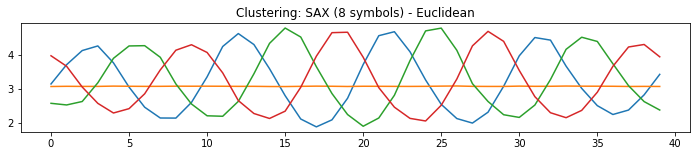

In [167]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - Euclidean')
plt.plot(np.squeeze(km.cluster_centers_).T) # plot dei clusters approssimati
plt.show()

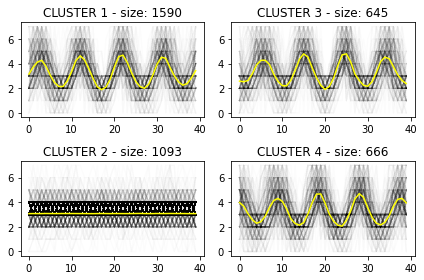

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [169]:

fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1590')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 1093')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 645')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 666')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

I clusters 1, 3 e 4 sono molto simili fra loro, mentre il cluster 2 no: il motivo potrebbe essere spiegato nelle celle successive (spoiler: 1 3 e 4 contengonoa attività dinamiche)

In [170]:
for i in range(4): # numero di time series nei clusters
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 368
Cluster 1: 6239
Cluster 2: 354
Cluster 3: 391


Per k=4 si ottengono dei clusters piuttosto omogenei,tranne che per il cluster 1 che contiene un numero maggiore di TS
- Cluster 0: 368
- Cluster 1: 6239
- Cluster 2: 354
- Cluster 3: 391

In [171]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))

SSE: 14.219191500448936 
Silouhette: 0.6151843172775328


In [172]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')

Cluster 0 

 3    0.361413
2    0.336957
1    0.301630
Name: Activity, dtype: float64 


Cluster 1 

 6    0.225517
5    0.220228
4    0.206123
1    0.139285
2    0.114281
3    0.094566
Name: Activity, dtype: float64 


Cluster 2 

 3    0.355932
1    0.322034
2    0.322034
Name: Activity, dtype: float64 


Cluster 3 

 3    0.350384
1    0.337596
2    0.312020
Name: Activity, dtype: float64 




I clusters contengono solo attività dinamcihe, tranne il cluster 1 che contiene tutte le attività: in questo caso si ha una maggiore percentuale di attività statiche.
- **Le attività dinamiche sono più simili fra loro e quindi raggruppabili?** Ciò potrebbe denotare una maggiore similarità tra le attività dinamiche (di fatti si tratta di attività tutte legate al camminare).

Nei clusters 0,2 e 3 si ha una maggiore percentuale di TS con attività 3 (WALKING_DOWNSTAIRS); mentre nel cluster 1 svetta l'attività 6 (laying)

## SAX (8 symbols) - DTW (soft)

In [173]:
km = TimeSeriesKMeans(n_clusters=4, metric="softdtw", metric_params= {"gamma": .01}, max_iter=5, random_state=42, verbose=True)
km.fit(df_sax)

288.844 --> 153.274 --> 148.058 --> 148.471 --> 148.177 --> 


TimeSeriesKMeans(max_iter=5, metric='softdtw', metric_params={'gamma': 0.01},
                 n_clusters=4, random_state=42, verbose=True)

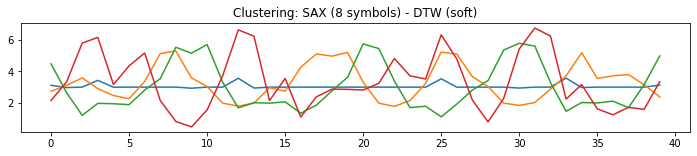

In [174]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW (soft)')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

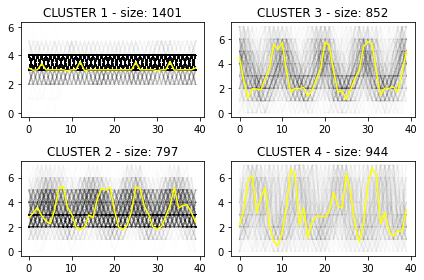

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [175]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1401')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.009)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 797')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.009)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 852')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.009)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 944')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.009)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [176]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 6087
Cluster 1: 720
Cluster 2: 357
Cluster 3: 188


In [177]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))


SSE: 148.17664691768348 
Silouhette: 0.5706862084807574


In [178]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')

Cluster 0 

 6    0.229834
5    0.225727
4    0.210777
1    0.141120
2    0.114999
3    0.077542
Name: Activity, dtype: float64 


Cluster 1 

 3    0.451389
2    0.277778
1    0.259722
6    0.006944
4    0.004167
Name: Activity, dtype: float64 


Cluster 2 

 2    0.400560
3    0.336134
1    0.254902
6    0.008403
Name: Activity, dtype: float64 


Cluster 3 

 1    0.473404
3    0.367021
2    0.159574
Name: Activity, dtype: float64 




Si ha una maggiore eterogeneità: 
- il cluster 0 ha tutte e 6 le attività (maggior percentuale di attività statiche)
- il cluster 1 ha un maggior numero di attività dinamiche, con un numero ridotto di 6 e 4 (laying e sitting)
- il cluster 2 oltre alle attività dinamiche ha un numero ridotto di 6 (LAYING)
- il cluster 3 solo attività dinamiche

Si riperesenta il trend del caso precedente, in quanto in ogni cluster sono sempre presenti tutte e 3 le attività dinamiche con la presenza ogni tanto di qualche attività statica. Di solito si ha l'attività 6 (presente anche nel caso precedente), ciò potrebbe indicare che l'attività 6 risulta essere in qualche modo più simile alle attività dinamiche (ma sempre di molto molto poco)



**Sembra che abbia le migliori performance in quanto nei cluster 1 2 e 3 si ha una percentuale maggiore di ciascuna attività dinamica:**
- in cluster 1 attività 3 (walking down)
- in cluster 2 attività 2 (walking up)
- in cluster 3 attività 1 (walking)

Nel cluster 0 invece ha una maggiore percentuale l'attività 6 (laying)

## SAX (8 symbols) - DTW

In [179]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=100, random_state=42, verbose=True, n_jobs=6)
km.fit(df_sax)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 7352 out of 7352 | elapsed:    1.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  

6.287 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.113 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.093 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.090 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.089 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.088 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.088 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.087 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.087 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.087 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.078 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.077 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.077 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.076 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.076 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.075 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.075 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.074 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.073 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.073 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.073 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.073 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.073 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.073 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

5.073 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

TimeSeriesKMeans(max_iter=100, metric='dtw', n_clusters=4, n_jobs=6,
                 random_state=42, verbose=True)

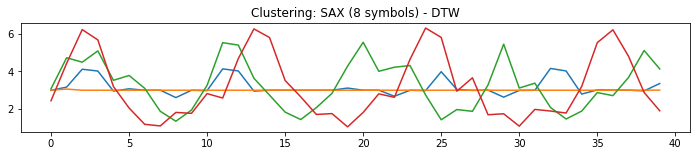

In [180]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

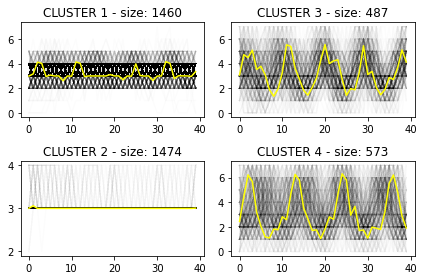

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [181]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1460')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 1474')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 487')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 573')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [182]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 2357
Cluster 1: 4053
Cluster 2: 497
Cluster 3: 445


In [183]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))


SSE: 5.073138698922152 
Silouhette: 0.41968941409250266


In [184]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')


Cluster 0 

 1    0.372932
2    0.336445
3    0.260501
6    0.015698
4    0.007213
5    0.007213
Name: Activity, dtype: float64 


Cluster 1 

 6    0.336788
5    0.334814
4    0.312855
1    0.010856
2    0.004688
Name: Activity, dtype: float64 


Cluster 2 

 3    0.404427
1    0.352113
2    0.231388
6    0.010060
4    0.002012
Name: Activity, dtype: float64 


Cluster 3 

 3    0.38427
2    0.32809
1    0.28764
Name: Activity, dtype: float64 




Minor capacità di discriminare le attività
- cluster 0  maggior numero di attività dinamicne; 1 attività principale
- cluster 1 maggior numero di attività statiche; 6 aittività principale
- cluster 2 maggior numero di attività statiche; 3 attività principale
- cluster 3 solo attività statiche; 3 attività principale

## Clustering k=2

Piccolo esperimento per vedere le performance del clustering con k = 2 per cercare di vedere se è in grado di discriminare le attività dinamiche da quelle statiche

#### SAX (8 symbols) - 2 clusters euclidean

In [185]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=100, random_state=42)
km.fit(df_sax)

TimeSeriesKMeans(max_iter=100, n_clusters=2, random_state=42)

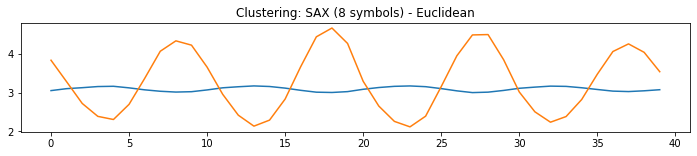

In [186]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - Euclidean')
plt.plot(np.squeeze(km.cluster_centers_).T) # plot dei clusters approssimati
plt.show()

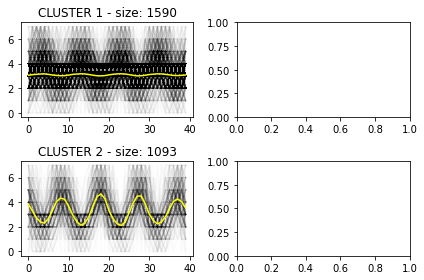

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [191]:

fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1590')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 1093')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)
fig.tight_layout()
plt.show()

I clusters 1, 3 e 4 sono molto simili fra loro, mentre il cluster 2 no: il motivo potrebbe essere spiegato nelle celle successive (spoiler: 1 3 e 4 contengonoa attività dinamiche)

In [192]:
for i in range(2): # numero di time series nei clusters
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 6921
Cluster 1: 431


Per k=2 si ottiene un maggior numero di TS in cluster 0 


In [193]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))

SSE: 17.204976783404664 
Silouhette: 0.606705231920892


In [194]:
for i in range(2):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')

Cluster 0 

 6    0.203294
5    0.198526
4    0.185667
1    0.155758
2    0.136541
3    0.120214
Name: Activity, dtype: float64 


Cluster 1 

 3    0.357309
1    0.343387
2    0.296984
4    0.002320
Name: Activity, dtype: float64 




Risultati deludenti: non riesce a discriminare le attività statiche da quelle dimaniche in maniera netta. Si ha solo una maggiore percentuale di attività statiche in cluster 0 e vice una maggior numero di attività dinamcie in cluster 1

#### SAX (8 symbols) - 2 clusters DTW (soft)

In [197]:
km = TimeSeriesKMeans(n_clusters=2, metric="softdtw", metric_params= {"gamma": .01}, max_iter=5, random_state=42, verbose=True)
km.fit(df_sax)

389.591 --> 220.318 --> 223.570 --> 231.513 --> 236.099 --> 


TimeSeriesKMeans(max_iter=5, metric='softdtw', metric_params={'gamma': 0.01},
                 n_clusters=2, random_state=42, verbose=True)

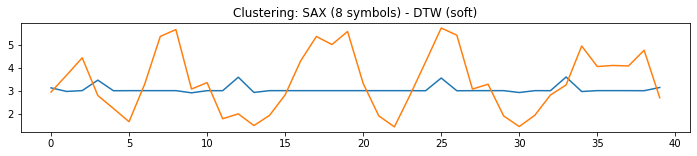

In [198]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW (soft)')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

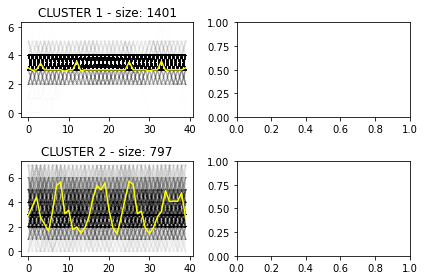

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [199]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1401')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.009)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 797')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.009)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)



fig.tight_layout()
plt.show()

In [200]:
for i in range(2):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 6193
Cluster 1: 1159


In [201]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))


SSE: 236.0991237717835 
Silouhette: 0.6127284501459789


In [202]:
for i in range(2):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')

Cluster 0 

 6    0.226223
5    0.221863
4    0.207331
1    0.140320
2    0.120459
3    0.083804
Name: Activity, dtype: float64 


Cluster 1 

 3    0.402934
1    0.308024
2    0.282140
6    0.005177
4    0.001726
Name: Activity, dtype: float64 




Stessi risultati dell'euclidean, possiamo notare che in ciascun cluster si ha un maggiore percentuale di differenti attività:
- in cluster 0 prevale un'attività statica (6 - laying) seguita poi dalle altre attività statiche e poi dinamcihe
- in cluster 1 prevale un'attività dinamica (3 - walking down) seguita a sua volta da altre attività dinamiche  poi 2 attività statiche

## SAX (8 symbols) - Sakoe-chiba

Si sono poi testati due vincoli del DTW Itakura parallelograme  Sakoe-Chiba band solo su k = 4

In [203]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", metric_params= {"global_constraint":"sakoe_chiba"}, max_iter=100, random_state=42, verbose=True, n_jobs=2)
km.fit(df_sax)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 7352 out of 7352 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  

14.250 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

11.267 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.928 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.794 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.729 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.637 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.603 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.548 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.474 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.395 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.252 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.201 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.162 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.153 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.149 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.136 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.132 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.130 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.127 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.125 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.123 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.090 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.066 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.058 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

10.020 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.984 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.961 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.955 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.947 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.938 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.937 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.936 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.936 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.936 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

9.936 --> 


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba'},
                 n_clusters=4, n_jobs=2, random_state=42, verbose=True)

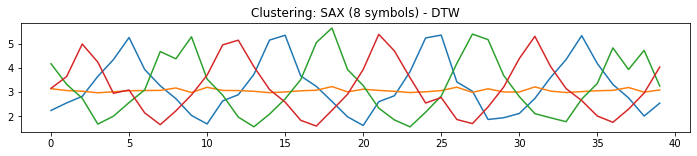

In [204]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

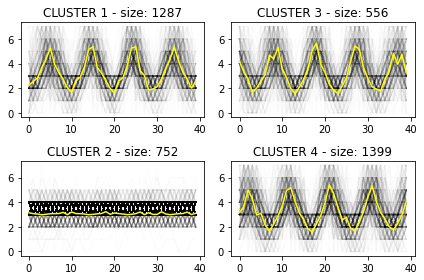

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [205]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1287')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 752')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 556')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 1399')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [206]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 405
Cluster 1: 6114
Cluster 2: 384
Cluster 3: 449


In [207]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))


SSE: 9.935838160168453 
Silouhette: 0.6103057654609586


In [211]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')


Cluster 0 

 3    0.382716
2    0.335802
1    0.276543
4    0.004938
Name: Activity, dtype: float64 


Cluster 1 

 6    0.229637
5    0.224730
4    0.210010
1    0.140334
2    0.112038
3    0.083252
Name: Activity, dtype: float64 


Cluster 2 

 3    0.380208
1    0.335938
2    0.281250
6    0.002604
Name: Activity, dtype: float64 


Cluster 3 

 3    0.391982
2    0.320713
1    0.282851
6    0.004454
Name: Activity, dtype: float64 




In questo caso, si ha in ciascun cluster la presenza di attività sia statiche che dinamiche, per lo più si ripresenta il trend secondo cui l'attività 6 può essere in qualche modo simile alle attività dinamiche:
- nei cluster 2 e 3 sono presenti in maggior percentuale le attività dinamiche con presenza molto molto ridotta dell'attività 6
- nel clsuter 1 invece si ha insieme alle attività dinamiche, la'ttività 4
- nel cluster 1 si hanno tutte le attivitò con una maggiore percentuale di attività statiche

Svetta soprattuto l'attività 3 nei clsuter 0,2,3; mentre in clsuter 1 svetta attività 6

## SAW (8 symbols) - Itakura

In [212]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", metric_params= {"global_constraint":"itakura"}, max_iter=100, random_state=42, verbose=True, n_jobs=6)
km.fit(df_sax)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    2.4s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 7352 out of 7352 | elapsed:    4.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  

9.053 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.874 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.765 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.726 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.711 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.705 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.702 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.695 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.684 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.674 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.666 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.657 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.651 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.640 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.638 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.3s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.638 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.638 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.638 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

6.638 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'itakura'}, n_clusters=4,
                 n_jobs=6, random_state=42, verbose=True)

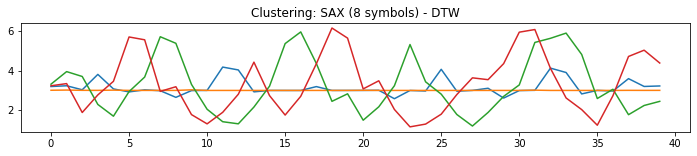

In [213]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

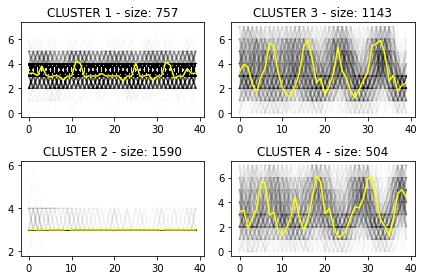

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [214]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 757')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 1590')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 1143')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 504')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [215]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 2430
Cluster 1: 4068
Cluster 2: 495
Cluster 3: 359


In [216]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))

SSE: 6.6376682615786295 
Silouhette: 0.4169537942591261


In [217]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')


Cluster 0 

 1    0.374486
2    0.338683
3    0.262551
6    0.013992
4    0.005761
5    0.004527
Name: Activity, dtype: float64 


Cluster 1 

 6    0.336283
5    0.335054
4    0.312684
1    0.012291
2    0.003441
3    0.000246
Name: Activity, dtype: float64 


Cluster 2 

 3    0.422222
1    0.296970
2    0.274747
6    0.006061
Name: Activity, dtype: float64 


Cluster 3 

 3    0.384401
1    0.331476
2    0.278552
6    0.005571
Name: Activity, dtype: float64 




## PAA

In [32]:
# PAA transform 
n_paa_segments = 40
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(norm_df)
#ts_paa = paa.inverse_transform(ts_paa)
ts_paa = ts_paa.squeeze()
df_paa = pd.DataFrame(ts_paa, index=df.index)

In [219]:
# computing optimal number of clusters
sse_paa=[]
sil_paa=[]

max_k=30
for k in tqdm(range(2, max_k+1)):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric='euclidean', max_iter=20, random_state=42, n_jobs=-1)
    kmeans.fit(df_paa)
    sil = silhouette_score(df_paa, kmeans.labels_)
    sse = kmeans.inertia_
    sil_paa.append(sil)
    sse_paa.append(sse) 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:27<00:00,  3.03s/it]


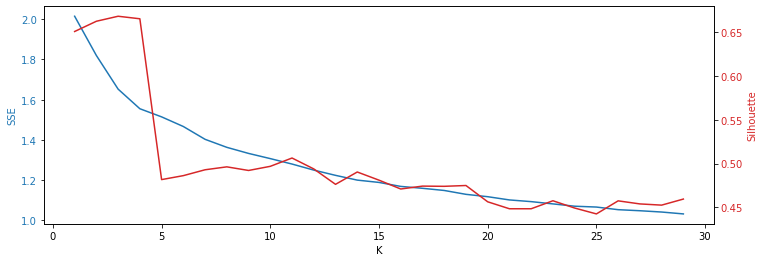

In [220]:
fig, ax1 = plt.subplots(figsize=(12,4))
t = np.arange(1,30,1)
color='tab:blue'
ax1.set_ylabel("SSE", color=color)
ax1.set_xlabel('K')
ax1.plot(t, sse_paa, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() #share the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)
ax2.plot(t, sil_paa, color=color)
ax2.tick_params(axis='y', labelcolor=color)

Si sceglie come k=4 sia in base alla silhouette score e SSE che per poter effettuare confronto con SAX

## PAA - Euclidean

In [221]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=100, random_state=42)
km.fit(df_paa)

TimeSeriesKMeans(max_iter=100, n_clusters=4, random_state=42)

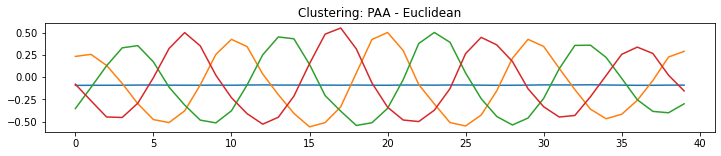

In [222]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - Euclidean')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

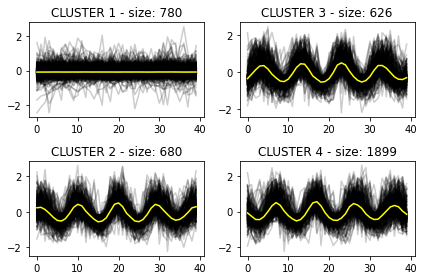

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [223]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 780')
ax[0, 0].plot(np.squeeze(df_paa[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 680')
ax[1, 0].plot(np.squeeze(df_paa[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 626')
ax[0, 1].plot(np.squeeze(df_paa[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 1899')
ax[1, 1].plot(np.squeeze(df_paa[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()


In [224]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 6416
Cluster 1: 306
Cluster 2: 332
Cluster 3: 298


Si ha un cluster con maggior numero di TS rispetto agli altri (come per SAX)

In [225]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_paa, km.labels_))


SSE: 1.652554326154079 
Silouhette: 0.6683875251251389


In [226]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')


Cluster 0 

 6    0.219296
5    0.214152
4    0.200436
1    0.141521
2    0.120948
3    0.103647
Name: Activity, dtype: float64 


Cluster 1 

 1    0.352941
3    0.330065
2    0.316993
Name: Activity, dtype: float64 


Cluster 2 

 2    0.337349
1    0.331325
3    0.331325
Name: Activity, dtype: float64 


Cluster 3 

 3    0.369128
1    0.335570
2    0.295302
Name: Activity, dtype: float64 




Anche qui si hanno dei risultati simili a SAX con euclidean come metrica: si hanno tre clusters contenenti attività dinamiche (clusger 1,2,3), ognuno avente un'attività differente come maggioranza (1 per cluster 1 , 2 per cluster 2, 3 per cluster 3). il cluster 0 ha una maggioranza di attività statcihe con maggior numero per attività 6. 

Ciò a dimostrazione della maggiore facilità di discriminare le attività statiche e raggrupparle insieme.

## PAA - DTW (soft)

In [227]:
km = TimeSeriesKMeans(n_clusters=4, metric="softdtw", metric_params= {"gamma": .01}, max_iter=5, random_state=42, n_jobs=-1)
km.fit(df_paa)

TimeSeriesKMeans(max_iter=5, metric='softdtw', metric_params={'gamma': 0.01},
                 n_clusters=4, n_jobs=-1, random_state=42)

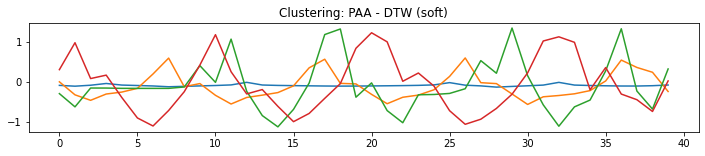

In [228]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - DTW (soft)')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

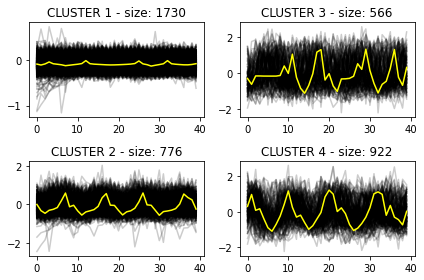

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [229]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1730')
ax[0, 0].plot(np.squeeze(df_paa[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 776')
ax[1, 0].plot(np.squeeze(df_paa[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 566')
ax[0, 1].plot(np.squeeze(df_paa[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 922')
ax[1, 1].plot(np.squeeze(df_paa[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [230]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 5968
Cluster 1: 983
Cluster 2: 176
Cluster 3: 225


In [231]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_paa, km.labels_))


SSE: 3.1434200771777636 
Silouhette: 0.581604233479863


In [232]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')


Cluster 0 

 6    0.234082
5    0.230228
4    0.214812
1    0.142594
2    0.111763
3    0.066521
Name: Activity, dtype: float64 


Cluster 1 

 3    0.435402
2    0.292981
1    0.257375
6    0.010173
4    0.004069
Name: Activity, dtype: float64 


Cluster 2 

 1    0.477273
3    0.460227
2    0.062500
Name: Activity, dtype: float64 


Cluster 3 

 2    0.475556
3    0.355556
1    0.168889
Name: Activity, dtype: float64 




Risultati molto simili a SAX con soft DTW, con la differenza che in questo caso anche il cluster 2 contiene solo attività dinamiche, e che ogni cluster contiene una differente attività come attività di prevalenza

## PAA - DTW

In [33]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", metric_params= {"global_constraint":"itakura"}, max_iter=100, random_state=42)
km.fit(df_paa)

TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'itakura'}, n_clusters=4,
                 random_state=42)

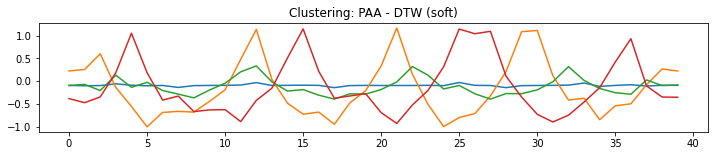

In [34]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - DTW (soft)')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

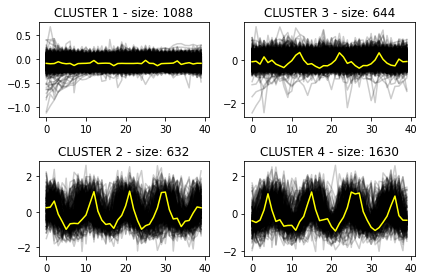

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [35]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1088')
ax[0, 0].plot(np.squeeze(df_paa[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 632')
ax[1, 0].plot(np.squeeze(df_paa[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 644')
ax[0, 1].plot(np.squeeze(df_paa[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 1630')
ax[1, 1].plot(np.squeeze(df_paa[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [36]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 5209
Cluster 1: 297
Cluster 2: 1555
Cluster 3: 291


In [37]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_paa, km.labels_))


SSE: 0.7792355111219283 
Silouhette: 0.4799397109160388


In [38]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')


Cluster 0 

 6    0.267806
5    0.263774
4    0.246112
1    0.104435
2    0.085429
3    0.032444
Name: Activity, dtype: float64 


Cluster 1 

 3    0.377104
1    0.319865
2    0.303030
Name: Activity, dtype: float64 


Cluster 2 

 3    0.385209
1    0.325402
2    0.279100
6    0.007717
4    0.002572
Name: Activity, dtype: float64 


Cluster 3 

 3    0.364261
2    0.357388
1    0.278351
Name: Activity, dtype: float64 




Presenza marcata in tutti i clusters delle attività dinamiche con prevalenza maggioritaria in quasi tutti i clusters nell'attività 3. Nel clsuter 0 si nota una maggiore presenza  delle attività statiche con maggior percentuale dell'attività à.


## RAW TS - Euclidean

In [39]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=5, random_state=42)
km.fit(norm_df)

TimeSeriesKMeans(max_iter=5, n_clusters=4, random_state=42)

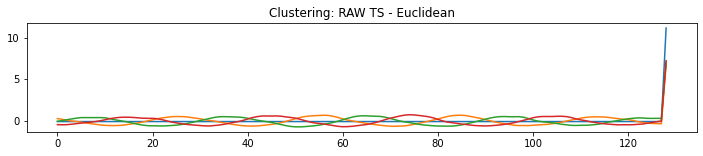

In [40]:
plt.figure(figsize=(12,2))
plt.title('Clustering: RAW TS - Euclidean')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

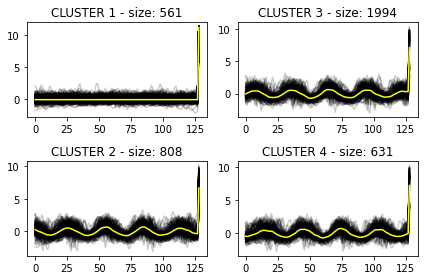

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [41]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 561')
ax[0, 0].plot(np.squeeze(norm_df[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 808')
ax[1, 0].plot(np.squeeze(norm_df[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 1994')
ax[0, 1].plot(np.squeeze(norm_df[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 631')
ax[1, 1].plot(np.squeeze(norm_df[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [42]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 6787
Cluster 1: 188
Cluster 2: 189
Cluster 3: 188


In [43]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(norm_df, km.labels_))


SSE: 6.930748779386636 
Silouhette: 0.7474885875043012


In [44]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')


Cluster 0 

 6    0.206571
5    0.202446
4    0.189480
1    0.155297
2    0.130396
3    0.115810
Name: Activity, dtype: float64 


Cluster 1 

 3    0.340426
1    0.329787
2    0.313830
6    0.015957
Name: Activity, dtype: float64 


Cluster 2 

 2    0.365079
3    0.354497
1    0.275132
6    0.005291
Name: Activity, dtype: float64 


Cluster 3 

 3    0.367021
2    0.319149
1    0.308511
6    0.005319
Name: Activity, dtype: float64 




## RAW TS - DTW

In [45]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10, random_state=42)
km.fit(norm_df)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4, random_state=42)

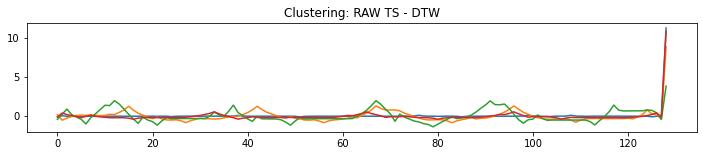

In [46]:
plt.figure(figsize=(12,2))
plt.title('Clustering: RAW TS - DTW')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

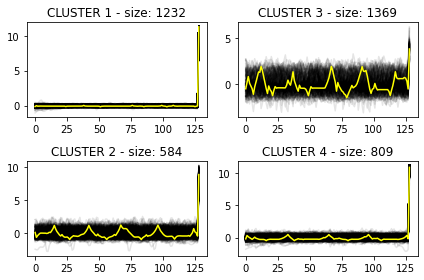

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [47]:

fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1 - size: 1232')
ax[0, 0].plot(np.squeeze(norm_df[km.labels_ == 0]).T,color='black', alpha=0.1)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2 - size: 584')
ax[1, 0].plot(np.squeeze(norm_df[km.labels_ == 1]).T,color='black', alpha=0.1)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3 - size: 1369')
ax[0, 1].plot(np.squeeze(norm_df[km.labels_ == 2]).T,color='black', alpha=0.1)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4 - size: 809')
ax[1, 1].plot(np.squeeze(norm_df[km.labels_ == 3]).T,color='black', alpha=0.1)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [48]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 5333
Cluster 1: 441
Cluster 2: 201
Cluster 3: 1377


In [49]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(norm_df, km.labels_))


SSE: 1.4751694945868579 
Silouhette: 0.4924897846432734


In [51]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['Activity'].value_counts(normalize=True),'\n\n')


Cluster 0 

 6    0.260829
5    0.257079
4    0.240203
1    0.111194
2    0.090193
3    0.040503
Name: Activity, dtype: float64 


Cluster 1 

 3    0.433107
2    0.349206
1    0.199546
6    0.015873
4    0.002268
Name: Activity, dtype: float64 


Cluster 2 

 1    0.472637
3    0.263682
2    0.263682
Name: Activity, dtype: float64 


Cluster 3 

 3    0.381990
1    0.326797
2    0.279593
6    0.006536
4    0.002905
5    0.002179
Name: Activity, dtype: float64 


